In [135]:
import numpy as np
import torch
import matplotlib.pyplot as plt

x = torch.linspace(0, 2, 100)
def f(x):
    coef = [1, 1.5, 2, 4.3]
    sum = 0
    for ci in coef:
        sum += np.sin(ci * x)
    return sum

#----------------------------

class FourierTransformPedreiro(torch.nn.Module):
    def __init__(self):
        super(FourierTransformPedreiro, self).__init__()
        self.coef = torch.nn.Parameter(torch.tensor([1.0, 2.0, 5.0, 7.0]))
        #self.coef = torch.tensor([1, 1.5, 2, 4.3])

    def forward(self, x):
        l1 = x * self.coef
        sin = torch.sin(l1)
        sum = torch.sum(sin)
        return sum

model = FourierTransformPedreiro()





Batch(1/500) loss: 1.0815131412082655, Lr: [0.01]
Batch(2/500) loss: 0.9756796606613716, Lr: [0.01]
Batch(3/500) loss: 0.9416073820454767, Lr: [0.01]
Batch(4/500) loss: 0.9108198425192177, Lr: [0.01]
Batch(5/500) loss: 0.8661045623852988, Lr: [0.01]
Batch(6/500) loss: 0.8015666183145368, Lr: [0.01]
Batch(7/500) loss: 0.713157608891779, Lr: [0.01]
Batch(8/500) loss: 0.6150835439933872, Lr: [0.01]
Batch(9/500) loss: 0.528964332024334, Lr: [0.01]
Batch(10/500) loss: 0.45389001218216435, Lr: [0.01]
Batch(11/500) loss: 0.36999510041147005, Lr: [0.01]
Batch(12/500) loss: 0.24313942374916223, Lr: [0.01]
Batch(13/500) loss: 0.09268758989928756, Lr: [0.01]
Batch(14/500) loss: 0.025815654950069985, Lr: [0.01]
Batch(15/500) loss: 0.008780034655042214, Lr: [0.01]
Batch(16/500) loss: 0.003184648912744166, Lr: [0.01]
Batch(17/500) loss: 0.0012234167212687907, Lr: [0.01]
Batch(18/500) loss: 0.0005354752468396385, Lr: [0.01]
Batch(19/500) loss: 0.00030509174530720886, Lr: [0.01]
Batch(20/500) loss: 0.

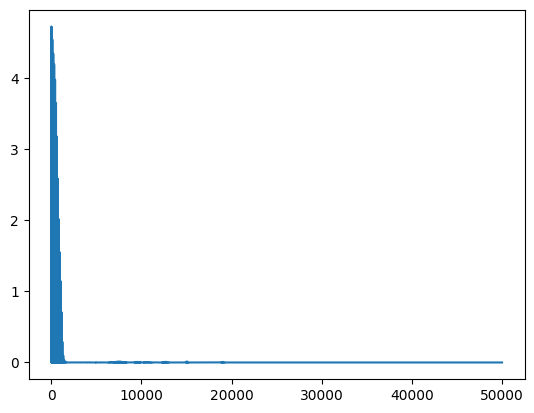

----------------
final loss: 0.0
final pred: 0.7030588388442993
final real: 0.7030737400054932
----------------


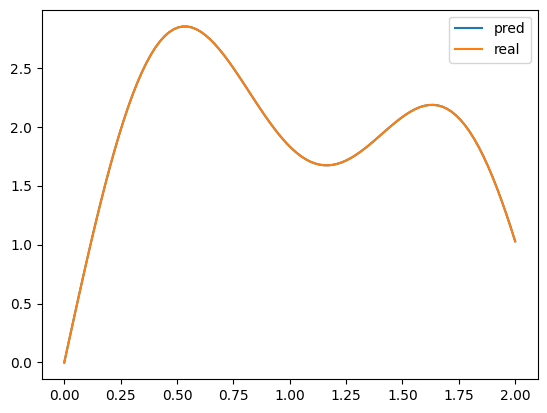

----------------
final coef: Parameter containing:
tensor([1.5001, 0.9998, 1.9997, 4.3001], requires_grad=True)
----------------


In [136]:



model.zero_grad()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5000, gamma=0.5)
losses = []
loss = 100
i = 0
while i < 50000:
    i+=1
    xi = x[i % len(x)]
    pred = model(xi)
    loss = (pred - f(xi))**2
    loss.backward()
    optimizer.step()
    scheduler.step()
    model.zero_grad()
    losses.append(loss.item())
    if i % 100 == 0:
        print(f"Batch({int(i/100)}/500) loss: {np.mean(losses[-100:])}, Lr: {scheduler.get_last_lr()}")

plt.plot(losses)
plt.show()

print("----------------")
print(f"final loss: {losses[-1]}")
print(f"final pred: {model(x[4]).item()}")
print(f"final real: {f(x[4]).item()}")
print("----------------")


y = []
for xi in x:
    y.append(model(xi).item())
plt.plot(x, y, label='pred')
plt.plot(x, f(x), label='real')
plt.legend()
plt.show()

print("----------------")
print(f"final coef: {model.coef}")
print("----------------")


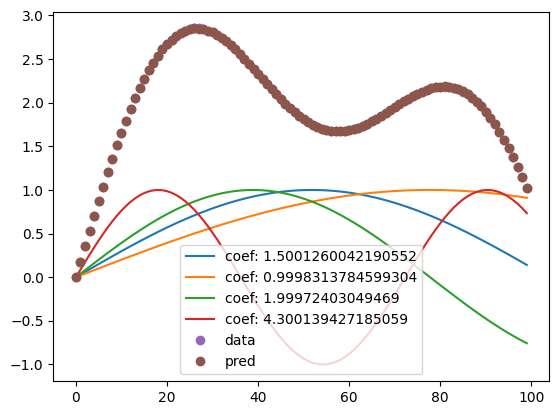

In [137]:
for coef in model.coef.data:
    plt.plot(np.sin(x * coef), label=f"coef: {coef}")

plt.plot(f(x), 'o', label="data")
plt.plot(y, 'o', label="pred")
plt.legend()
plt.show()

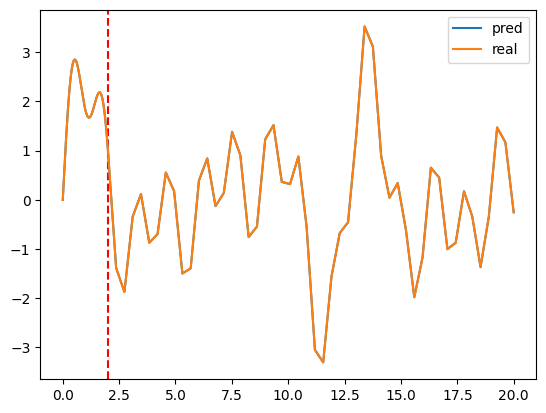

In [138]:
x_test = torch.linspace(2, 20, 50)
y_test = []

for xi in x_test:
    y_test.append(model(xi).item())

# convert to tensor
y_test = np.array(y_test)

final_x = np.concatenate((x, x_test))
final_y = np.concatenate((y, y_test))

plt.axvline(x=2, color='r', linestyle='--')
plt.plot(final_x, final_y, label='pred')
plt.plot(final_x, f(final_x), label='real')
plt.legend()
plt.show()

#-----------------------------